In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

Data Read and cleaning. Replaced all -200 values with it's previous cell data.

In [3]:
df=pd.read_csv('2019AIML054_Dataset_Question_2.csv')
df=df.drop('Date',axis=1)
df=df.drop('Time',axis=1)
cols=df.columns
for j in cols:
    for i in range(1,len(df)):
        if df[j][i]==-200:
            df.loc[i,j]=df.loc[i-1,j]
print(df)

      CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6         1360       150      11.9           1046      166   
1        2.0         1292       112       9.4            955      103   
2        2.2         1402        88       9.0            939      131   
3        2.2         1376        80       9.2            948      172   
4        1.6         1272        51       6.5            836      131   
5        1.2         1197        38       4.7            750       89   
6        1.2         1185        31       3.6            690       62   
7        1.0         1136        31       3.3            672       62   
8        0.9         1094        24       2.3            609       45   
9        0.6         1010        19       1.7            561       45   
10       0.6         1011        14       1.3            527       21   
11       0.7         1066         8       1.1            512       16   
12       0.7         1052        16       1.6      

FInding the corelation between the variables through heat map

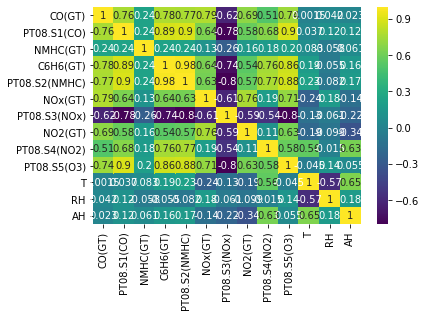

In [4]:
import seaborn as sns
sns_heatmap=sns.heatmap
sns_heatmap(df.corr(), annot=True,cmap='viridis')
# sns.set(font_scalar=2)
plt.show()

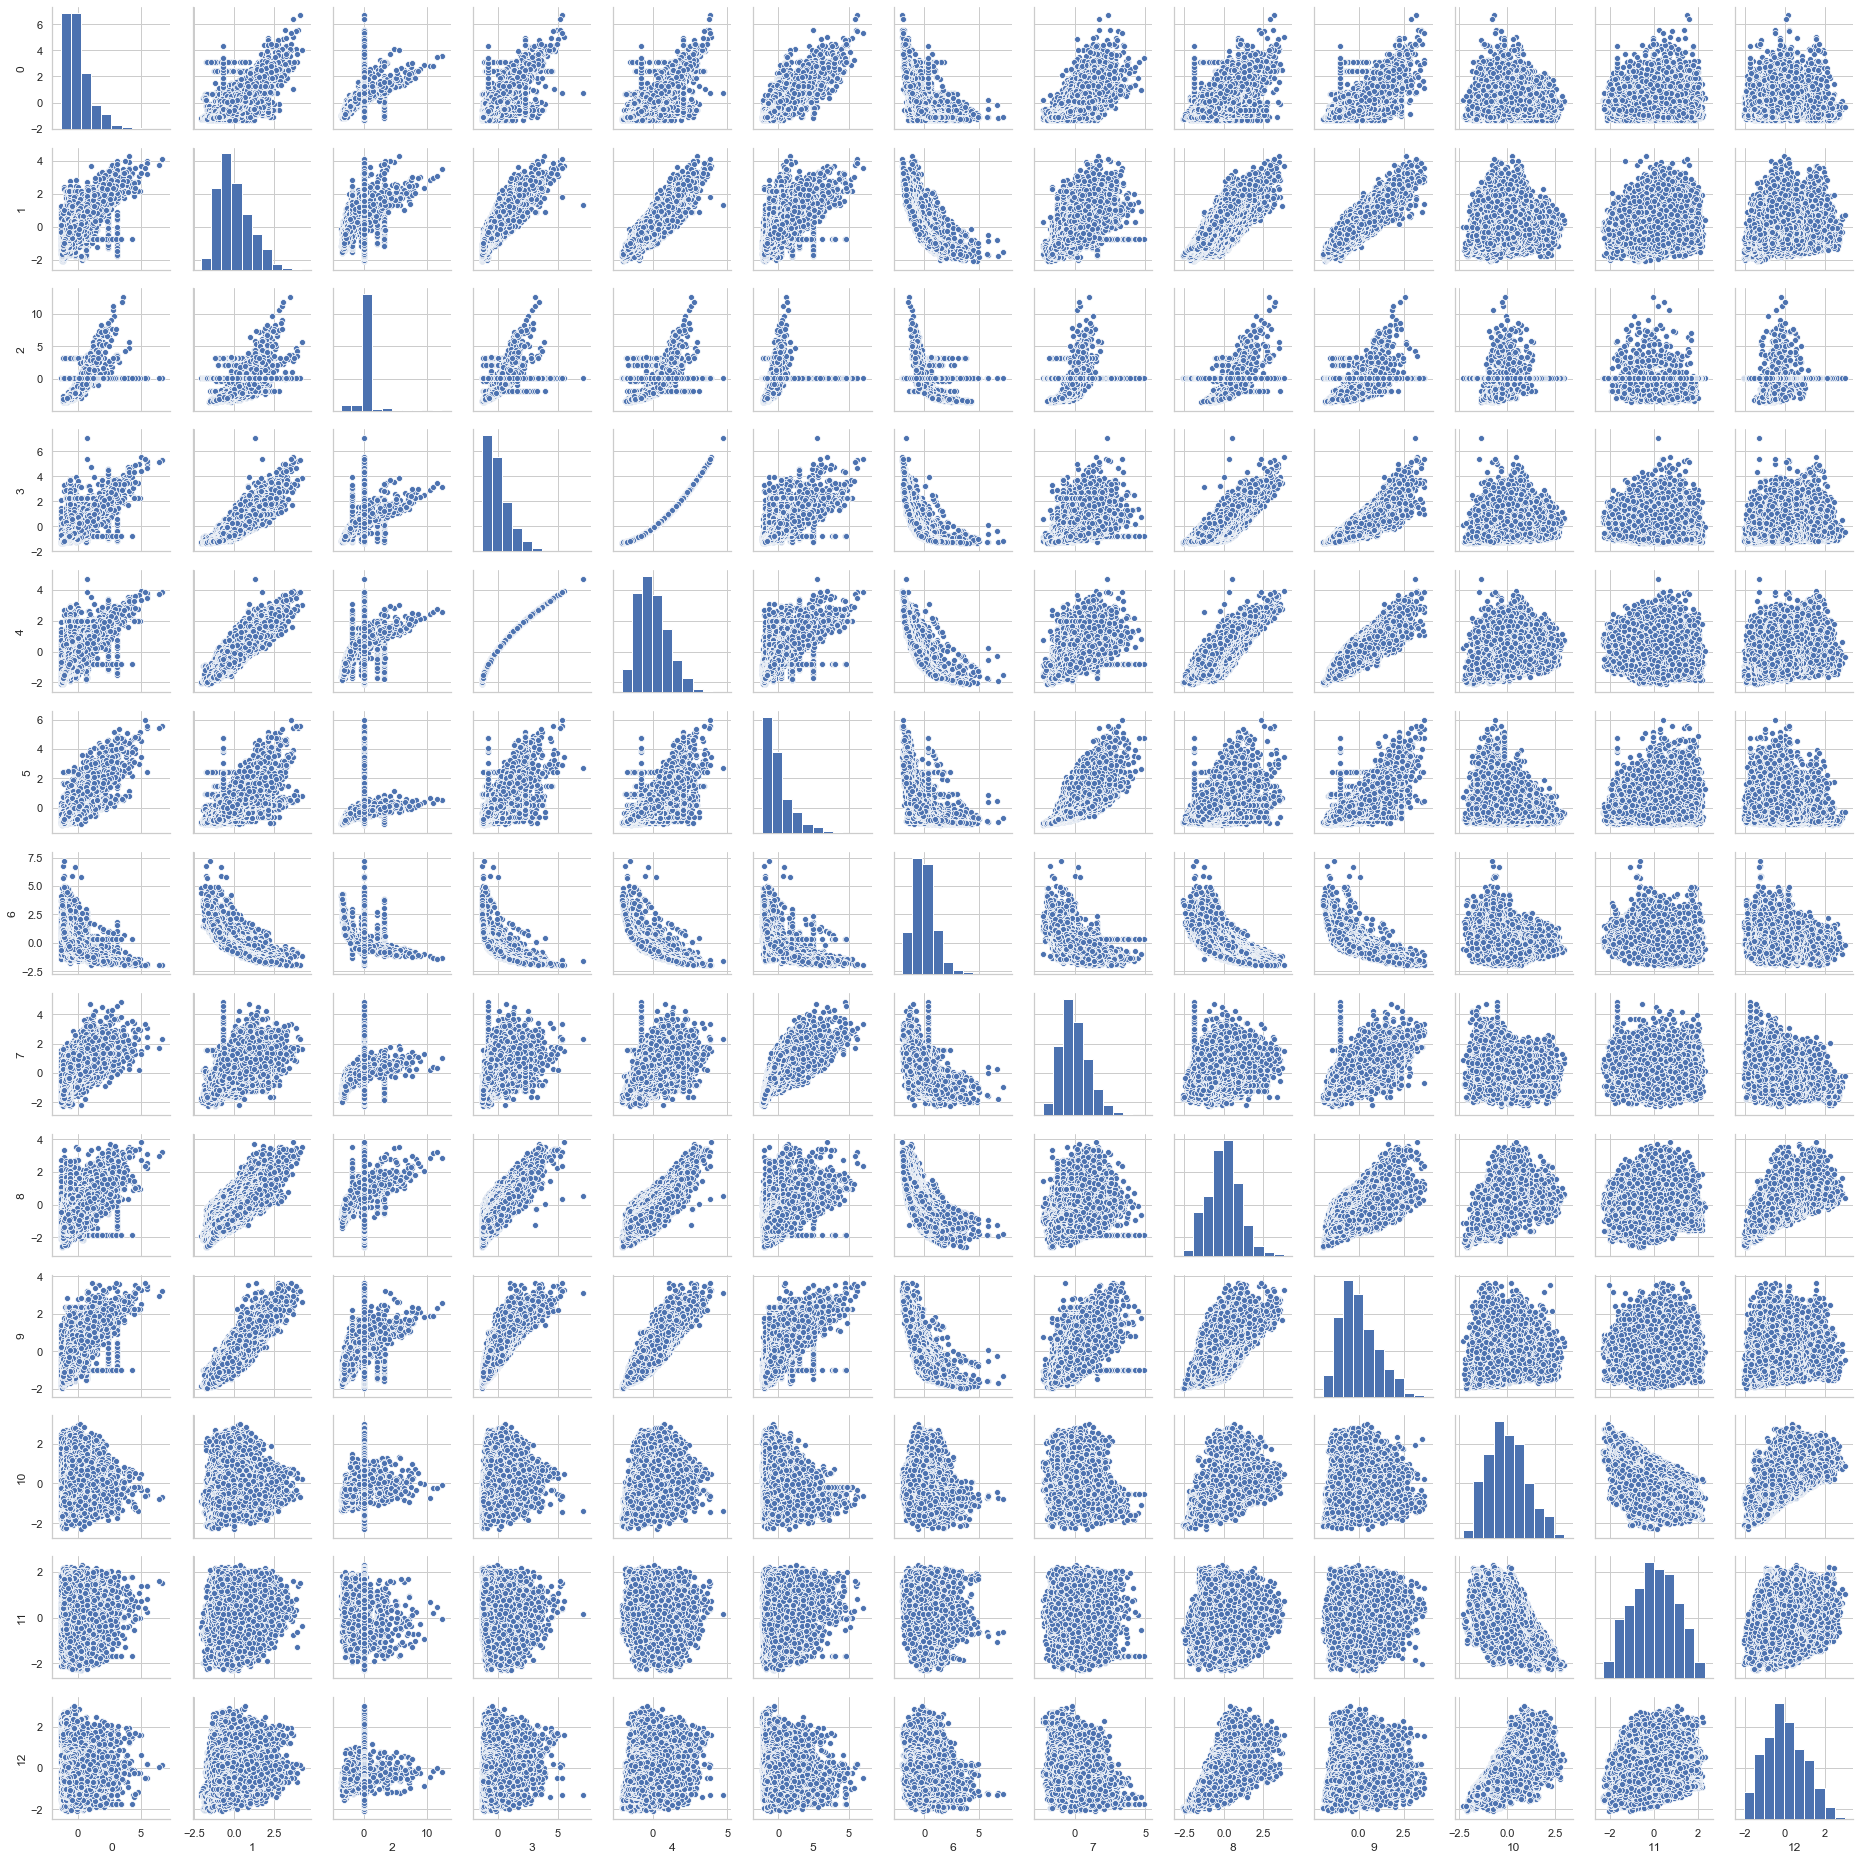

In [5]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
sns.set(style='whitegrid', context='notebook')
features_plot=df.columns

plot_data=df[features_plot]
plot_data=scaler.fit_transform(plot_data)
plot_data=pd.DataFrame(plot_data)

sns.pairplot(plot_data,height=2.0);
plt.tight_layout()
plt.show()

stochastic gradient descent Method

In [10]:
x=df.drop('C6H6(GT)',axis=1)
x=df.drop('PT08.S4(NO2)',axis=1)
x=df.drop('PT08.S5(O3)',axis=1)
y=df['CO(GT)'].values.reshape(-1,1)

column_names=x.columns
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=column_names)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
sgd_reg=SGDRegressor(max_iter=10000,tol=0.001,eta0=1e-3)
sgd_reg.fit(x_train,y_train)
print("R^2 score for train data:", sgd_reg.score(x_train,y_train))
print("R^2 score for test data:", sgd_reg.score(x_train,y_train))
print("coefficient is:", sgd_reg.coef_)
print("intercept is:", sgd_reg.intercept_)
print("rmse for train data:",math.sqrt(mean_squared_error(y_train,sgd_reg.predict(x_train))))
print("rmse for test data:",math.sqrt(mean_squared_error(y_test,sgd_reg.predict(x_test))))

R^2 score for train data: 0.9944726760257937
R^2 score for test data: 0.9944726760257937
coefficient is: [ 1.23704118  0.0192828   0.02177882  0.03414295 -0.01337865  0.148097
  0.08887548  0.0731184   0.10200787 -0.01166778 -0.01004424  0.01022025]
intercept is: [2.08294101]
rmse for train data: 0.10952462420232524
rmse for test data: 0.10726967967098158


C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Batch Gradient Descent Method

In [44]:
def gradient_descent(x,y):
    m_curr=b_curr=0
    iterations=50
    n=len(x)
    learning_rate=0.000001
    for i in range(iterations):
        y_pred=m_curr*x+b_curr
        cost=(1/n)*sum(val**2 for val in (y-y_pred))
        md=-(2/n)*sum(x*(y-y_pred))
        bd=-(2/n)*sum(y-y_pred)
        m_curr=m_curr-learning_rate*md
        b_curr=b_curr-learning_rate*bd
        print("m {},b {}, cost {}, iteration {}".format(m_curr,b_curr,cost,i))
x=df['PT08.S2(NMHC)']
y=df['CO(GT)']
gradient_descent(x,y)

m 0.004534541177727912,b 4.164390296035138e-06, cost 6.495621459869557, iteration 0
m 0.000353109968433068,b -2.1927546393959522e-07, cost 5.695026070380925, iteration 1
m 0.004208929315786324,b 3.279468903170088e-06, cost 5.014262329961576, iteration 2
m 0.0006533671623766045,b -4.90385303934762e-07, cost 4.435394055438836, iteration 3
m 0.003932054527841907,b 2.442345818403413e-06, cost 3.9431697188986305, iteration 4
m 0.000908682488938935,b -8.055710192982801e-07, cost 3.524620613371341, iteration 5
m 0.0036966219373465677,b 1.6458667035616635e-06, cost 3.168719164347288, iteration 6
m 0.0011257827650479838,b -1.1582353876076228e-06, cost 2.8660883846023655, iteration 7
m 0.0034964285515993285,b 8.839480687903631e-07, cost 2.608754817296488, iteration 8
m 0.0013103879499148808,b -1.542768646687348e-06, cost 2.3899384581001075, iteration 9
m 0.0033261998305589733,b 1.5141698992612788e-07, cost 2.2038741213938757, iteration 10
m 0.001467361849664772,b -1.95440069335624e-06, cost 2.04

In [50]:
def gradient_descent(x,y):
    m_curr=b_curr=0
    iterations=20
    n=len(x)
    learning_rate=0.0000001
    for i in range(iterations):
        y_pred=m_curr*x+b_curr
        cost=(1/n)*sum(val**2 for val in (y-y_pred))
        md=-(2/n)*sum(x*(y-y_pred))
        bd=-(2/n)*sum(y-y_pred)
        m_curr=m_curr-learning_rate*md
        b_curr=b_curr-learning_rate*bd
        print("m {},b {}, cost {}, iteration {}".format(m_curr,b_curr,cost,i))
x=df['PT08.S1(CO)']
y=df['CO(GT)']
gradient_descent(x,y)

m 0.0005084824388158625,b 4.1643902960351385e-07, cost 6.495621459869557, iteration 0
m 0.000888397235130111,b 7.207341711239392e-07, cost 4.236947995379294, iteration 1
m 0.0011722521772254528,b 9.412405355891211e-07, cost 2.976067472069347, iteration 2
m 0.0013843355956853498,b 1.099143763325792e-06, cost 2.2721942817693948, iteration 3
m 0.001542794618742623,b 1.2102727945067824e-06, cost 1.8792645309568958, iteration 4
m 0.001661187949494084,b 1.286454288280976e-06, cost 1.6599156593005124, iteration 5
m 0.0017496460299198054,b 1.3365245827162818e-06, cost 1.5374664735107333, iteration 6
m 0.0018157378623040654,b 1.367085784922363e-06, cost 1.469110510238848, iteration 7
m 0.001865118658501597,b 1.3830706869622287e-06, cost 1.4309515150603358, iteration 8
m 0.001902013733807701,b 1.388164845148844e-06, cost 1.4096496572381725, iteration 9
m 0.001929580050296177,b 1.3851219383647828e-06, cost 1.3977581176629432, iteration 10
m 0.0019501763454431364,b 1.3759993893556046e-06, cost 1.3

In [54]:
def gradient_descent(x,y):
    m_curr=b_curr=0
    iterations=30
    n=len(x)
    learning_rate=0.000001
    for i in range(iterations):
        y_pred=m_curr*x+b_curr
        cost=(1/n)*sum(val**2 for val in (y-y_pred))
        md=-(2/n)*sum(x*(y-y_pred))
        bd=-(2/n)*sum(y-y_pred)
        m_curr=m_curr-learning_rate*md
        b_curr=b_curr-learning_rate*bd
        print("m {},b {}, cost {}, iteration {}".format(m_curr,b_curr,cost,i))
x=df['NOx(GT)']
y=df['CO(GT)']
gradient_descent(x,y)

m 0.0014809769584268537,b 4.164390296035138e-06, cost 6.495621459869557, iteration 0
m 0.0026638663744603316,b 7.615737491386242e-06, cost 4.523043241966029, iteration 1
m 0.0036086665439444337,b 1.0497560966006788e-05, cost 3.264621567324001, iteration 2
m 0.004363299459650393,b 1.2924492887225809e-05, cost 2.461801584418775, iteration 3
m 0.004966041498579555,b 1.4988092553800435e-05, cost 1.9496362254502786, iteration 4
m 0.005447464866761483,b 1.67614904437127e-05, cost 1.6228962324275173, iteration 5
m 0.005831988275023538,b 1.8303097519939414e-05, cost 1.4144497861251757, iteration 6
m 0.006139115498719496,b 1.9659567936672137e-05, cost 1.2814696231132456, iteration 7
m 0.006384424643333289,b 2.0868165419629526e-05, cost 1.1966337593600553, iteration 8
m 0.006580358293239837,b 2.1958653347411026e-05, cost 1.142511923780245, iteration 9
m 0.0067368546213502425,b 2.2954804402124155e-05, cost 1.1079843400882492, iteration 10
m 0.006861851470626649,b 2.3875606361406423e-05, cost 1.08

In [56]:
def gradient_descent(x,y):
    m_curr=b_curr=0
    iterations=50
    n=len(x)
    learning_rate=0.000001
    for i in range(iterations):
        y_pred=m_curr*x+b_curr
        cost=(1/n)*sum(val**2 for val in (y-y_pred))
        md=-(2/n)*sum(x*(y-y_pred))
        bd=-(2/n)*sum(y-y_pred)
        m_curr=m_curr-learning_rate*md
        b_curr=b_curr-learning_rate*bd
        print("m {},b {}, cost {}, iteration {}".format(m_curr,b_curr,cost,i))
x=df['NO2(GT)']
y=df['CO(GT)']
gradient_descent(x,y)

m 0.000551927134765411,b 4.164390296035138e-06, cost 6.495621459869557, iteration 0
m 0.0010881772342559836,b 8.207994184645385e-06, cost 6.195307097713996, iteration 1
m 0.0016091955922822804,b 1.2134242509162509e-05, cost 5.911810826485415, iteration 2
m 0.0021154148544357205,b 1.5946468662521937e-05, cost 5.644190805814814, iteration 3
m 0.002607255377351251,b 1.9647911355264438e-05, cost 5.391557939921083, iteration 4
m 0.003085125577765471,b 2.324171730491458e-05, cost 5.153072923829078, iteration 5
m 0.003549422271659981,b 2.6730943848969898e-05, cost 4.927943455003336, iteration 6
m 0.004000531003771725,b 3.0118561483669955e-05, cost 4.715421601135867, iteration 7
m 0.004438826367743753,b 3.340745633065376e-05, cost 4.5148013153404705, iteration 8
m 0.0048646723171824014,b 3.660043253355362e-05, cost 4.3254160905020465, iteration 9
m 0.005278422467879161,b 3.970021458651568e-05, cost 4.146636744984805, iteration 10
m 0.005680420391448129,b 4.270944959658086e-05, cost 3.977869332

In [60]:
def gradient_descent(x,y):
    m_curr=b_curr=0
    iterations=30
    n=len(x)
    learning_rate=0.000001
    for i in range(iterations):
        y_pred=m_curr*x+b_curr
        cost=(1/n)*sum(val**2 for val in (y-y_pred))
        md=-(2/n)*sum(x*(y-y_pred))
        bd=-(2/n)*sum(y-y_pred)
        m_curr=m_curr-learning_rate*md
        b_curr=b_curr-learning_rate*bd
        print("m {},b {}, cost {}, iteration {}".format(m_curr,b_curr,cost,i))
x=df['PT08.S3(NOx)']
y=df['CO(GT)']
gradient_descent(x,y)

m 0.0030015424601902243,b 4.164390296035138e-06, cost 6.495621459869557, iteration 0
m 0.001447697418231602,b 3.3297499693949833e-06, cost 4.322951891515417, iteration 1
m 0.002252093105376581,b 5.083016067351354e-06, cost 3.7406881927883484, iteration 2
m 0.0018356707317576848,b 5.496570150072443e-06, cost 3.5846442632183093, iteration 3
m 0.002051243522625101,b 6.603668393639804e-06, cost 3.5428248187874254, iteration 4
m 0.0019396439847315047,b 7.351731291946794e-06, cost 3.531616889705051, iteration 5
m 0.001997415572951112,b 8.285659989133058e-06, cost 3.5286126734326073, iteration 6
m 0.001967506829312078,b 9.123369136622035e-06, cost 3.5278070057490125, iteration 7
m 0.001982988588595998,b 1.001088915614688e-05, cost 3.527590536640625, iteration 8
m 0.0019749725153342212,b 1.087262277128344e-05, cost 3.5275319694148632, iteration 9
m 0.0019791208398827094,b 1.1747705308321478e-05, cost 3.5275157189999162, iteration 10
m 0.001976971878339397,b 1.2615877125164786e-05, cost 3.52751